In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
sns.set()
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input  , GlobalMaxPooling1D , LSTM , Embedding, Dropout , Flatten , SpatialDropout1D
from tensorflow.keras.models import Model , Sequential

In [6]:
df = pd.read_csv('raw_combined.csv' ,  on_bad_lines='skip')

In [7]:
df.head()

,Unnamed: 0,label,tweet
0,0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
df1 = df.drop(['Unnamed: 0'] , axis=1)

In [9]:
df1

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
56740,0,ate @user isz that youuu?ðððððð...
56741,0,to see nina turner on the airwaves trying to...
56742,0,listening to sad songs on a monday morning otw...
56743,1,"@user #sikh #temple vandalised in in #calgary,..."


,label
0,33866
1,22879


Non HOLD : HOLD  ::   1.48 : 1


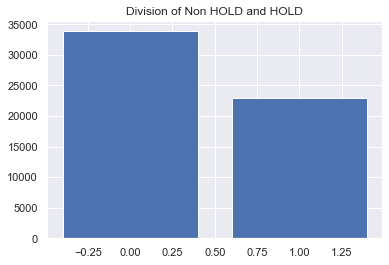

In [10]:
display(df1['label'].value_counts().to_frame())
print("Non HOLD : HOLD  ::  ",(df1['label'].value_counts()[0]/df1['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],df1['label'].value_counts())
plt.title("Division of Non HOLD and HOLD")
plt.show()

In [11]:
df_L1 = df1[df1["label"] == 1]
onelenShape = df_L1.shape[0] // 2
#oneLabelLength
df_L1 = df_L1[:onelenShape]
df_L1.shape[0]

11439

In [12]:
df2_equal = pd.concat([df1 , df_L1] , axis = 0)
df2_equal

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
13694,1,Only white trash and morons are offended by th...
13695,1,Only white trash watch football.
13696,1,Only white trash watch hockey.
13697,1,Only white trash would call slants and hindis ...


,label
1,34318
0,33866


Non HOLD : HOLD  ::   0.99 : 1


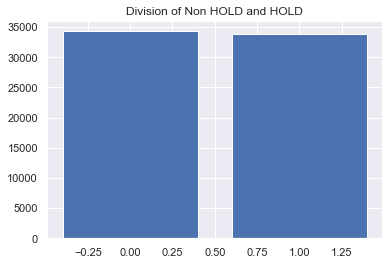

In [13]:
display(df2_equal['label'].value_counts().to_frame())
print("Non HOLD : HOLD  ::  ",(df2_equal['label'].value_counts()[0]/df2_equal['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],df2_equal['label'].value_counts())
plt.title("Division of Non HOLD and HOLD")
plt.show()

In [14]:
df2_equal

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
13694,1,Only white trash and morons are offended by th...
13695,1,Only white trash watch football.
13696,1,Only white trash watch hockey.
13697,1,Only white trash would call slants and hindis ...


In [15]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)


def clean_text(text ): 
    delete_dict = {sp_character: '' fo
                   r sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()


In [16]:
df2 = df2_equal.copy()

In [17]:
df2['tweet'] = df1['tweet'].apply(clean)

In [19]:
df2

,label,tweet
0,0,rt mayasolov woman shouldnt complain clean ho...
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,1,rt cganderson vivabas look like tranni
4,1,rt shenikarobert shit hear might true might f...
...,...,...
13694,1,white trash moron offend redskin team name liber
13695,1,white trash watch footbal
13696,1,white trash watch hockey
13697,1,white trash would call slant hindi moslem equal


In [20]:
df2 = df2.sample(frac = 1)

In [21]:
Y = df2['label'].values

In [22]:
df_train , df_test , Ytrain , Ytest = train_test_split(df2['tweet'] , Y , test_size=0.33)

In [23]:
Ytest

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
df_test.head()

40499     user chopperlov thought amp prayer go  victim...
11806                               redneck land  tennesse
30839    uh oh doesnt sound good amp say pic break heað...
25965    user  countdown begin  sonasay   day go akira ...
9096                           final done wif mock regent 
Name: tweet, dtype: object

In [25]:
MAX_VOCAB_SIZE = 40000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE , oov_token='unk')
tokenizer.fit_on_texts(df_train)

In [26]:
sequence_train = tokenizer.texts_to_sequences(df_train)
sequence_test = tokenizer.texts_to_sequences(df_test) #as we test with

In [27]:
sequence_train

[[1109, 2477, 1075, 335, 2671, 2478],
 [4, 17109, 4990, 2672, 68, 2265, 1859, 492, 211, 1638, 1478],
 [5, 6, 344, 8, 39, 4991, 190, 7888],
 [4, 17110, 4992, 35, 214, 32, 106, 1056, 4992, 106, 214, 32, 199, 3],
 [17111, 16, 1344, 17112, 3, 16, 2569],
 [153, 2673, 3, 2266],
 [34, 141, 207, 5, 1203, 1542, 21],
 [4, 10184, 3279, 37, 768, 11, 2935, 1590, 31, 3280],
 [10, 3, 95, 337, 3112, 232, 408, 7889, 457, 12, 160, 523, 235, 21, 769],
 [4, 17113, 108, 306, 499, 70, 16, 108, 15, 499, 5, 181, 100, 354, 70, 137],
 [10185, 259, 60, 188],
 [4, 17114, 266, 5],
 [35, 199, 413, 3, 4993, 17115, 193, 17, 3, 905],
 [189, 108, 66, 8, 102, 291, 697, 142, 154],
 [838, 2936, 145, 11],
 [39, 281, 1345, 17116, 648, 5674, 203, 17117],
 [2,
  2267,
  17118,
  2267,
  2805,
  135,
  620,
  1110,
  7890,
  484,
  17119,
  17120,
  8,
  17121],
 [17122,
  257,
  698,
  2937,
  1346,
  10186,
  2268,
  6530,
  2479,
  568,
  559,
  5675,
  7891,
  3113,
  2175,
  3],
 [17123, 17124, 17125, 79, 175, 295, 17126,

In [28]:
word2index = tokenizer.word_index
V = len(word2index)
print('Unique Words in the Data Set found are : ' , V)

Unique Words in the Data Set found are :  44874


In [29]:
word2index

{'unk': 5017,
 'user': 2,
 'bitch': 3,
 'rt': 4,
 'hoe': 5,
 'like': 6,
 'im': 7,
 'love': 8,
 'get': 9,
 'fuck': 10,
 'pussi': 11,
 'dont': 12,
 'day': 13,
 'u': 14,
 'nigga': 15,
 'amp': 16,
 'ass': 17,
 'got': 18,
 'go': 19,
 'happi': 20,
 'shit': 21,
 'make': 22,
 'one': 23,
 'time': 24,
 'look': 25,
 'lol': 26,
 'want': 27,
 'thank': 28,
 'know': 29,
 'aint': 30,
 'cant': 31,
 'good': 32,
 'life': 33,
 'see': 34,
 'girl': 35,
 'need': 36,
 'say': 37,
 'peopl': 38,
 'new': 39,
 'trash': 40,
 'today': 41,
 'think': 42,
 'take': 43,
 'come': 44,
 'feel': 45,
 'call': 46,
 'your': 47,
 'that': 48,
 'man': 49,
 'bad': 50,
 'back': 51,
 'work': 52,
 'hate': 53,
 'realli': 54,
 'talk': 55,
 'friend': 56,
 'even': 57,
 'â\x80¦': 58,
 'yall': 59,
 'posit': 60,
 'still': 61,
 'right': 62,
 'let': 63,
 'never': 64,
 'yo': 65,
 'father': 66,
 'smile': 67,
 'way': 68,
 'faggot': 69,
 'play': 70,
 'live': 71,
 'bihday': 72,
 'wait': 73,
 'thing': 74,
 'year': 75,
 'white': 76,
 'real': 77,
 'st

In [30]:
train_data = pad_sequences(sequence_train)#making every sequence(sentence) of same length as we have to provide data to dense layer(N*T Matrix)
print("Train Data Shape : " ,train_data.shape)

T = train_data.shape[1]

Train Data Shape :  (45683, 26)


In [31]:
test_data = pad_sequences(sequence_test , maxlen=T)#making every sequence(sentence) of same length as we have to provide data to dense layer(N*T Matrix)
print("Shape of test data : ",test_data.shape)

Shape of test data :  (22501, 26)


In [33]:
embedding_lay_dim = 20
hidden_lay_dime = 15
#the size of embedding should be v*embedding_lay_dim + 1 as index in tensorflow start from 0 not 1


i = Input(shape=(T,))
x = Embedding(V + 1 , embedding_lay_dim)(i)
x = LSTM(embedding_lay_dim, return_sequences=True , recurrent_dropout = 0.2)(x)
#x = Flatten()(x)
#x = Dense(512 , activation='relu')(x)
#x = Dropout(0.4)(x)
#x = Dense(8 , activation='relu')(x)
#x = Dropout(0.4)(x)
x = GlobalMaxPooling1D()(x)
#x = Dropout(0.5)(x)
x = Dense(1 , activation='sigmoid')(x)
model = Model(i , x)



In [34]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=1
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model.compile(loss='binary_crossentropy' , optimizer = 'rmsprop' , metrics=['accuracy'])
model.summary()
r = model.fit(train_data , Ytrain , epochs = 10, validation_data=(test_data , Ytest) , verbose = 1 , callbacks=[stop,checkpoint])



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26)]              0         
                                                                 
 embedding (Embedding)       (None, 26, 20)            897500    
                                                                 
 lstm (LSTM)                 (None, 26, 20)            3280      
                                                                 
 global_max_pooling1d (Globa  (None, 20)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 900,801
Trainable params: 900,801
Non-trainable params: 0
_______________________________________________________

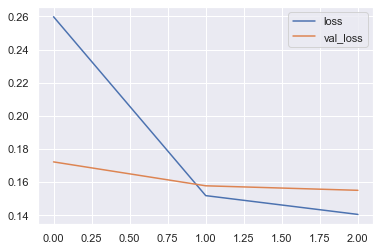

In [35]:
#loss per iteration val aloss and loss should go hand in hand
plt.plot(r.history['loss'] , label='loss')
plt.plot(r.history['val_loss'] , label='val_loss')
plt.legend()

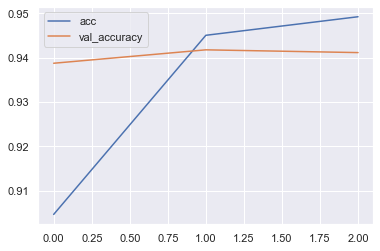

In [36]:
#accuracy per iteration val aloss and loss should go hand in hand
plt.plot(r.history['accuracy'] , label='acc')
plt.plot(r.history['val_accuracy'] , label='val_accuracy')
plt.legend()

In [38]:
model.save('HOLD_Mark3_OF_2.h5')

In [39]:
pickle.dump(tokenizer, open("HOLD-Mark3_tokenizer_2.pkl", "wb"))

In [40]:
pickle.dump(pad_sequences, open("pad_seq-Mark3_2.pkl", "wb"))